In [1]:
%matplotlib inline
import os
import sys
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import climatools.plot.plot

from IPython import display

In [2]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu', 
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'n2o',
                       'band07_wn_1215_1380',
                       'P_50_T_250',
                       '4.e-21')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')
                       

In [3]:
dir_clirad = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                          'clirad/LW/examples',
                          '1_0912_mdc_Steve_CLIRAD_lw',
                          'g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          '4.e-21',
                          'dgs_g234_linearlogavg')

path_coolr_k1 = os.path.join(dir_clirad, 'b07_coolr_k1.txt')
path_coolr_k2 = os.path.join(dir_clirad, 'b07_coolr_k2.txt')
path_coolr_k3 = os.path.join(dir_clirad, 'b07_coolr_k3.txt')
path_coolr_k4 = os.path.join(dir_clirad, 'b07_coolr_k4.txt')

path_sfd_k1 = os.path.join(dir_clirad, 'b07_sfd_k1.txt')
path_sfd_k2 = os.path.join(dir_clirad, 'b07_sfd_k2.txt')
path_sfd_k3 = os.path.join(dir_clirad, 'b07_sfd_k3.txt')
path_sfd_k4 = os.path.join(dir_clirad, 'b07_sfd_k4.txt')

path_sfu_k1 = os.path.join(dir_clirad, 'b07_sfu_k1.txt')
path_sfu_k2 = os.path.join(dir_clirad, 'b07_sfu_k2.txt')
path_sfu_k3 = os.path.join(dir_clirad, 'b07_sfu_k3.txt')
path_sfu_k4 = os.path.join(dir_clirad, 'b07_sfu_k4.txt')

path_fnet_k1 = os.path.join(dir_clirad, 'b07_fnet_k1.txt')
path_fnet_k2 = os.path.join(dir_clirad, 'b07_fnet_k2.txt')
path_fnet_k3 = os.path.join(dir_clirad, 'b07_fnet_k3.txt')
path_fnet_k4 = os.path.join(dir_clirad, 'b07_fnet_k4.txt')

In [4]:
# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_fluxg = ds

In [5]:
# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_coolrg = ds

In [6]:
# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

In [7]:
# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [8]:
# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

In [9]:
# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [10]:
# load clirad's fluxg
paths_flug = [path_sfu_k1, path_sfu_k2, path_sfu_k3, path_sfu_k4]
paths_fldg = [path_sfd_k1, path_sfd_k2, path_sfd_k3, path_sfd_k4]
paths_fnetg = [path_fnet_k1, path_fnet_k2, path_fnet_k3, path_fnet_k4]

df_flug = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_flug], axis=1)
df_fldg = pd.concat([pd.read_csv(path, header=None)
                     for path in paths_fldg], axis=1)
df_fnetg = pd.concat([pd.read_csv(path, header=None)
                      for path in paths_fnetg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_fluxg.coords['pressure'])
ds.coords['g'] = ('g', ds_fluxg.coords['g'])
ds.coords['level'] = ('pressure', range(1, ds_fluxg.dims['pressure'] + 1))
ds['flug'] = (('pressure', 'g'), df_flug)
ds['fldg'] = (('pressure', 'g'), df_fldg)
ds['fnetg'] = (('pressure', 'g'), df_fnetg)

ds_fluxg_clirad = ds

In [11]:
# load clirad's coolrg
paths_coolrg = [path_coolr_k1, 
                path_coolr_k2, 
                path_coolr_k3, 
                path_coolr_k4]

df_coolrg = pd.concat([pd.read_csv(path, header=None) 
                       for path in paths_coolrg], axis=1)

ds = xr.Dataset()
ds.coords['pressure'] = ('pressure', ds_coolrg.coords['pressure'])
ds.coords['g'] = ('g', ds_coolrg.coords['g'])
ds.coords['layer'] = ('pressure', 
                      range(1, ds_coolrg.dims['pressure'] + 1))
ds['coolrg'] = (('pressure', 'g'), df_coolrg)

ds_coolrg_clirad = ds

In [19]:
ds_absmean['absmeanlog']

<xarray.DataArray 'absmeanlog' (pressure: 75, g: 4)>
array([[  2.52394450e-29,   1.93625420e-25,   1.97630400e-24,
          1.61136170e-24],
       [  9.47028660e-29,   7.33198410e-25,   1.18631240e-23,
          3.46891020e-23],
       [  1.68721790e-28,   1.19717830e-24,   2.63446160e-23,
          2.15194530e-21],
       [  2.32951720e-28,   1.54648060e-24,   3.35783400e-23,
          2.65544630e-21],
       [  3.21323150e-28,   1.99838740e-24,   4.27888010e-23,
          3.25011930e-21],
       [  4.43178170e-28,   2.58561800e-24,   5.46162060e-23,
          3.97663620e-21],
       [  6.11380270e-28,   3.35087220e-24,   6.98651330e-23,
          4.87385480e-21],
       [  8.43733980e-28,   4.35058710e-24,   8.95859490e-23,
          5.98840720e-21],
       [  1.16494630e-27,   5.65980610e-24,   1.15162700e-22,
          7.37881880e-21],
       [  1.60933260e-27,   7.37863710e-24,   1.48426550e-22,
          9.11961810e-21],
       [  2.22460660e-27,   9.64103390e-24,   1.91808310e

In [98]:
# write out absmean into CLIRAD-compatible input files

with open('gk_linear.dat', mode='w', encoding='utf-8') as f:
    f.write(ds_absmean['absmean'].to_pandas().to_string())

with open('gk_log.dat', mode='w', encoding='utf-8') as f:
    f.write(ds_absmean['absmeanlog'].to_pandas().to_string())

In [21]:
!pwd

/nuwa_cluster/home/jackyu/radiation/offline_radiation_notebooks/longwave/lblnew_20160916/study__g1_threshold/n2o/band07_wn_1215_1380/P_50_T_250/4.e-21


In [12]:
print()
print('dgs')

ds_dgdgs['dgs'].to_dataframe()


dgs


,dgs
g,
1,0.675487
2,0.253233
3,0.058507
4,0.012773


In [26]:
print()
print('Mean absorption coefficient')

ds_absmean.to_dataframe().unstack(0)


Mean absorption coefficient


layer                   absmean                              \
g               1   2   3   4             1             2             3   
pressure                                                                  
0.000312        1   1   1   1  1.538294e-23  1.816379e-21  3.789404e-20   
0.000750        2   2   2   2  1.548571e-23  1.820049e-21  3.805287e-20   
0.001052        3   3   3   3  1.570084e-23  1.827772e-21  3.838962e-20   
0.001476        4   4   4   4  1.593356e-23  1.836102e-21  3.874891e-20   
0.002070        5   5   5   5  1.617228e-23  1.844618e-21  3.911160e-20   
0.002904        6   6   6   6  1.641752e-23  1.853329e-21  3.947760e-20   
0.004074        7   7   7   7  1.667027e-23  1.862261e-21  3.984722e-20   
0.005714        8   8   8   8  1.693186e-23  1.871449e-21  4.022091e-20   
0.008015        9   9   9   9  1.720422e-23  1.880942e-21  4.059934e-20   
0.011243       10  10  10  10  1.748990e-23  1.890805e-21  4.098330e-20   
0.015771       11  11  11  11  1.779247e-23  1.901129e-21  4.137395e-20   
0.022122       12  12  12  12  1.811708e-23  1.912047e-21  4.177310e-20   
0.031031       13  13  13  13  1.847093e-23  1.923743e-21  4.218331e-20   
0.043528       14  14  14  14  1.888204e-23  1.937102e-21  4.263288e-20   
0.061057       15  15  15  15  1.994757e-23  1.972725e-21  4.390965e-20   
0.085645       16  16  16  16  2.286798e-23  2.070503e-21  4.737819e-20   
0.120136       17  17  17  17  2.777517e-23  2.228174e-21  5.254800e-20   
0.168516       18  18  18  18  3.412041e-23  2.421937e-21  5.825323e-20   
0.236379       19  19  19  19  4.222747e-23  2.656277e-21  6.444360e-20   
0.331549       20  20  20  20  5.258623e-23  2.937630e-21  7.112704e-20   
0.465100       21  21  21  21  6.578869e-23  3.272083e-21  7.828056e-20   
0.652400       22  22  22  22  8.258627e-23  3.669183e-21  8.595145e-20   
0.915100       23  23  23  23  9.980784e-23  4.048452e-21  9.257895e-20   
1.283650       24  24  24  24  1.056972e-22  4.163015e-21  9.412091e-20   
1.800600       25  25  25  25  1.007860e-22  4.037141e-21  9.109258e-20   
2.525700       26  26  26  26  9.643718e-23  3.916924e-21  8.752817e-20   
3.542800       27  27  27  27  9.630662e-23  3.888670e-21  8.485316e-20   
4.969550       28  28  28  28  1.017877e-22  3.992869e-21  8.372726e-20   
6.970850       29  29  29  29  1.142930e-22  4.270372e-21  8.479697e-20   
9.778100       30  30  30  30  1.354292e-22  4.770548e-21  8.873571e-20   
...           ...  ..  ..  ..           ...           ...           ...   
311.637500     46  46  46  46  2.752023e-21  6.140263e-20  4.190156e-19   
335.412490     47  47  47  47  2.980621e-21  6.471994e-20  4.196195e-19   
359.187500     48  48  48  48  3.209692e-21  6.788946e-20  4.190856e-19   
382.962510     49  49  49  49  3.438891e-21  7.091746e-20  4.176391e-19   
406.737500     50  50  50  50  3.666504e-21  7.378356e-20  4.153128e-19   
430.512500     51  51  51  51  3.893087e-21  7.651552e-20  4.123910e-19   
454.287490     52  52  52  52  4.118452e-21  7.912431e-20  4.090224e-19   
478.062500     53  53  53  53  4.342317e-21  8.161585e-20  4.053051e-19   
501.837490     54  54  54  54  4.564594e-21  8.399556e-20  4.013186e-19   
525.612490     55  55  55  55  4.785327e-21  8.626846e-20  3.971281e-19   
549.387510     56  56  56  56  5.004578e-21  8.843935e-20  3.927875e-19   
573.162510     57  57  57  57  5.222367e-21  9.051292e-20  3.883418e-19   
596.937500     58  58  58  58  5.438686e-21  9.249365e-20  3.838281e-19   
620.712490     59  59  59  59  5.653508e-21  9.438591e-20  3.792772e-19   
644.487490     60  60  60  60  5.866792e-21  9.619386e-20  3.747144e-19   
668.262510     61  61  61  61  6.077544e-21  9.790603e-20  3.701022e-19   
692.037510     62  62  62  62  6.286000e-21  9.953136e-20  3.654813e-19   
715.812500     63  63  63  63  6.492747e-21  1.010838e-19  3.609055e-19   
739.587490     64  64  64  64  6.697714e-21  1.025670e-19  3.563857e-19   
763.362490     65  65  65  65  6.9007

In [13]:
def summary_fluxg(ps=None):
    if not ps:
        ps = [0, 75]
        
    dict_ds = {'crd': ds_fluxg, 'clirad': ds_fluxg_clirad}
    dict_df = {case: ds.isel(pressure=ps).to_dataframe()
               for case, ds in dict_ds.items()}    
    dict_df = {case: df.set_index(['level'], append=True)
               for case, df in dict_df.items()}
    return dict_df



    
def summary_flux(ps=None):
    if not ps:
        ps = [0, 75]
    
    dict_ds = {'crd': ds_fluxg, 'clirad': ds_fluxg_clirad}
    dict_df = {case: ds.sum('g').isel(pressure=ps).to_dataframe()
               for case, ds in dict_ds.items()}
    dict_df = {case: df.set_index(['level'], append=True)
               for case, df in dict_df.items()}
    return dict_df
    
    
    
    
def summary_coolrg(ps=None):
    if not ps:
        ps = [0, 74]
        
    dict_ds = {'crd': ds_coolrg, 'clirad': ds_coolrg_clirad}
    dict_df = {case: ds.isel(pressure=ps).to_dataframe()
               for case, ds in dict_ds.items()}
    dict_df = {case: df.set_index(['layer'], append=True)
               for case, df in dict_df.items()}
    return dict_df
    
    
    
def summary_coolr(ps=None):
    if not ps:
        ps = [0, 74]
        
    dict_ds = {'crd': ds_coolrg, 'clirad': ds_coolrg_clirad}
    dict_df = {case: ds.sum('g').isel(pressure=ps).to_dataframe()
               for case, ds in dict_ds.items()}
    dict_df = {case: df.set_index(['layer'], append=True)
               for case, df in dict_df.items()}
    return dict_df
    

def print_diff_benchmark(dict_df, 
                         benchmark='crd', 
                         title='Untitled'):
        
    print(title)
    
    othercases = [case for case in dict_df.keys()]
    othercases.remove(benchmark)   

    print(benchmark)
    display.display(dict_df[benchmark])
    
    for case in othercases:
        print(case)
        display.display(dict_df[case])

    for case in othercases:
        print('{} - {}'.format(case, benchmark))
        display.display(dict_df[case] - dict_df[benchmark])


In [12]:
###
names_var = ['flug', 'fnetg', 'coolrg']
colors = ['darkred', 'lightcoral', 'blue']

###
names_model = ['crd', 'clirad']

linestyles = ['-', '--']


### 
yscales = ['linear', 'log']

varlims_from_indexrange = [None, (1e-4, 5e1)]


###
vartypes = ['flux', 'cooling rate']
names_allowedvar = [['flug', 'fnetg'], ['coolrg']]


###
names_ds = list(itertools.product(vartypes, names_model))
dss = [ds_fluxg, ds_fluxg_clirad, ds_coolrg, ds_coolrg_clirad]


###
names_ax = list(itertools.product(vartypes,
                                  yscales))

##########################
dict_color = dict(zip(names_var, colors))
dict_linestyle = dict(zip(names_model, linestyles))
dict_varlim = dict(zip(yscales, varlims_from_indexrange))
dict_ds = dict(zip(names_ds, dss))
dict_names_allowedvar = dict(zip(vartypes, names_allowedvar))


-----  g-group 1  ---------------


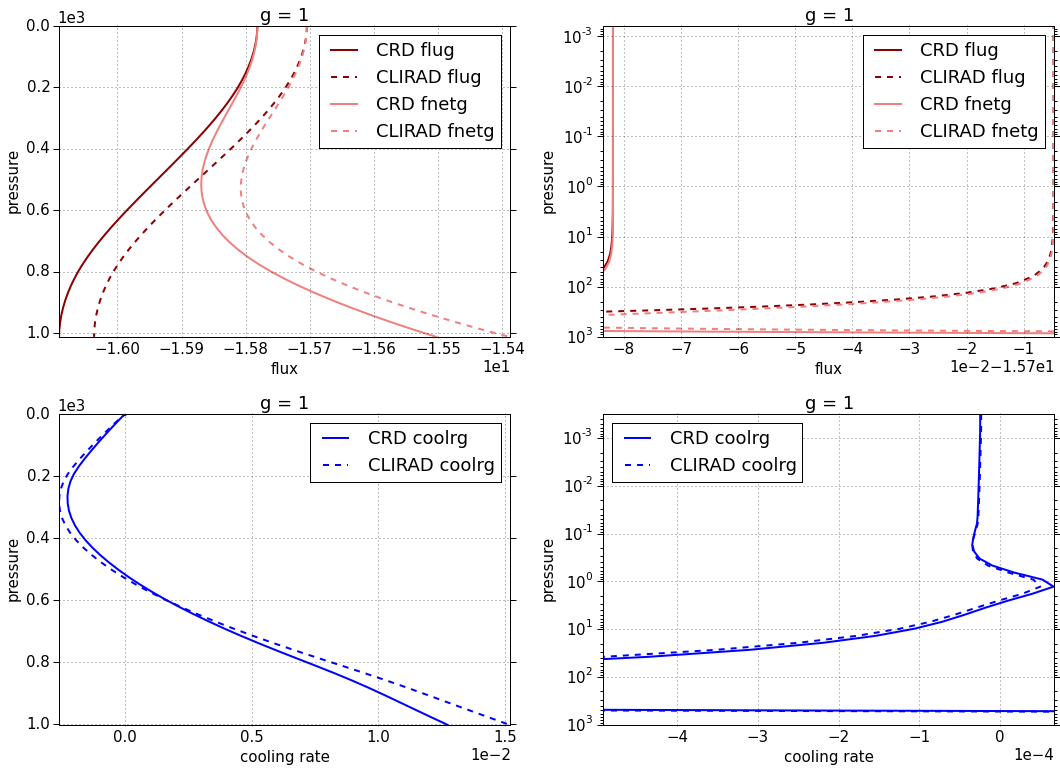


-----  g-group 2  ---------------


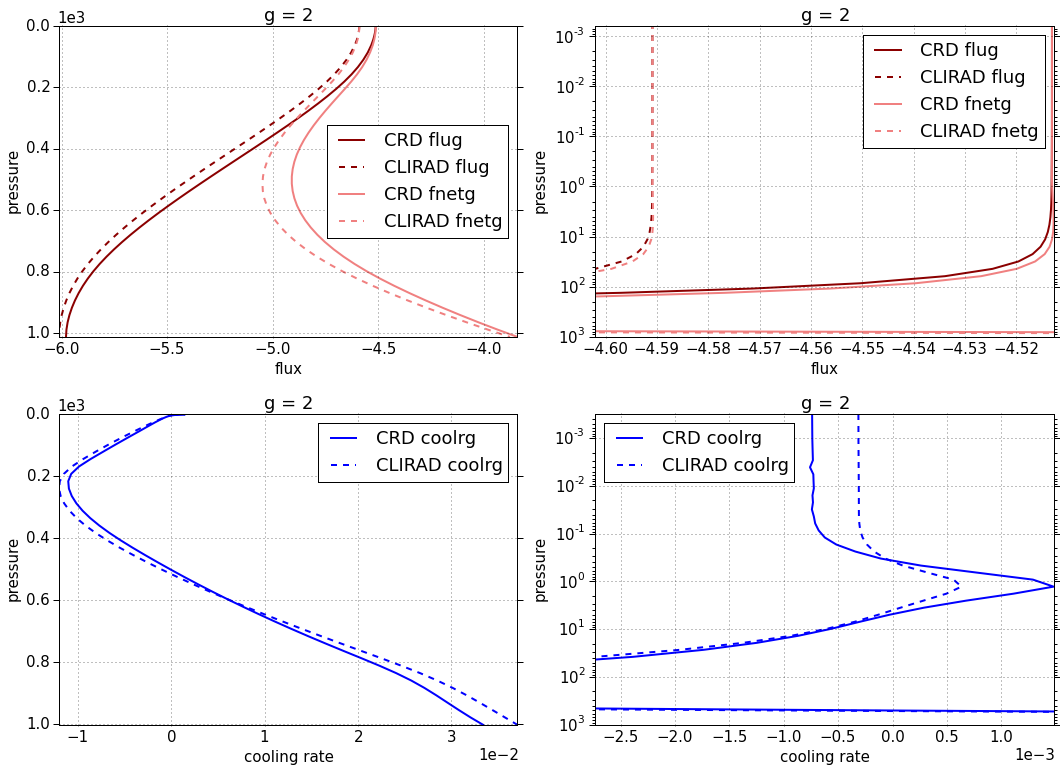


-----  g-group 3  ---------------


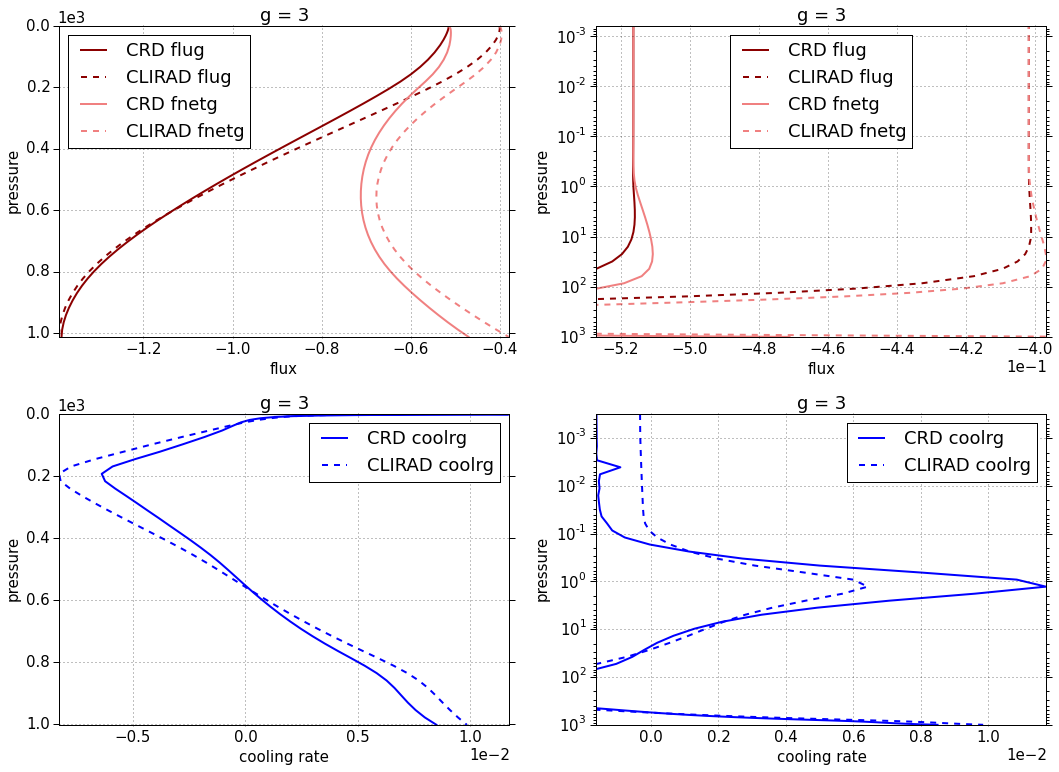


-----  g-group 4  ---------------


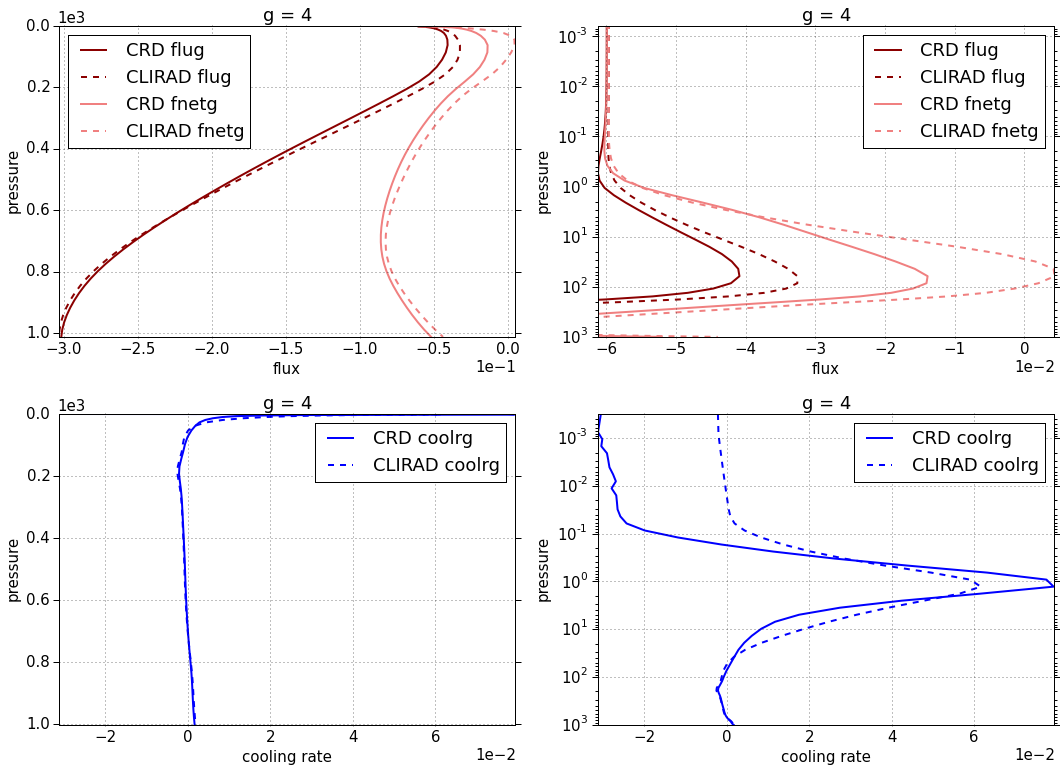

In [13]:
matplotlib.rcParams.update({'font.size': 15,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 


for g in [1, 2, 3, 4]:
    
    print()
    print(5 * '-' + '  g-group {}  '.format(g) + 15 * '-')
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
    axs = axs.flatten()

    for ax, (vartype, yscale) in zip(axs, names_ax):
        for name_var in dict_names_allowedvar[vartype]:
            for model in names_model:
                ds = dict_ds[(vartype, model)]
                ds[name_var].sel(g=g)\
                .climaviz\
                .plot(ax=ax, 
                      linewidth=2, grid=True,
                      label=model.upper() + ' ' + name_var,
                      color=dict_color[name_var],
                      linestyle=dict_linestyle[model],
                      index_on_yaxis=True, 
                      yincrease=False, yscale=yscale,
                      varlim_from_indexrange=dict_varlim[yscale])
            
                ax.set_xlabel(vartype)
            
    plt.tight_layout()
    display.display(plt.gcf())
    plt.close()

In [15]:
print(3 * '\n')
print_diff_benchmark(summary_fluxg(), 
                     benchmark='crd', 
                     title='Flux. Individual g')





Flux. Individual g
crd


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.513059  0.000000  -4.513059
  1013     76     -5.979005  2.136721  -3.842284
3 0        1      -0.516288  0.000000  -0.516288
  1013     76     -1.383483  0.912395  -0.471088
4 0        1      -0.059940  0.000000  -0.059940
  1013     76     -0.301745  0.249674  -0.052071

clirad


flug          fldg      fnetg
g pressure level                                    
1 0        1     -15.704752  2.672792e-13 -15.704752
  1013     76    -16.036479  6.475093e-01 -15.388969
2 0        1      -4.590877  4.912106e-12  -4.590877
  1013     76     -6.011898  2.134107e+00  -3.877790
3 0        1      -0.401811  2.367501e-11  -0.401811
  1013     76     -1.388980  1.007774e+00  -0.381206
4 0        1      -0.059677  5.419841e-10  -0.059677
  1013     76     -0.303245  2.592302e-01  -0.044015

clirad - crd


flug          fldg     fnetg
g pressure level                                  
1 0        1      0.077211  2.672792e-13  0.077211
  1013     76     0.054459  5.948160e-02  0.113941
2 0        1     -0.077817  4.912106e-12 -0.077817
  1013     76    -0.032892 -2.613800e-03 -0.035506
3 0        1      0.114476  2.367501e-11  0.114476
  1013     76    -0.005498  9.537980e-02  0.089882
4 0        1      0.000263  5.419841e-10  0.000263
  1013     76    -0.001500  9.555900e-03  0.008056

In [16]:
print(3 * '\n')
print_diff_benchmark(summary_flux(),
                     benchmark='crd',
                     title='Flux. Total over g')





Flux. Total over g
crd


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871251,0.000000,-20.871251
1013,76,-23.755171,3.886818,-19.868353


clirad


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.757118,5.708385e-10,-20.757118
1013,76,-23.740602,4.048621e+00,-19.691980


clirad - crd


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.114133,5.708385e-10,0.114133
1013,76,0.014569,1.618035e-01,0.176372


In [17]:
print(3 * '\n')
print_diff_benchmark(summary_coolrg(),
                     benchmark='crd', 
                     title='Cooling rate. Individual g.')





Cooling rate. Individual g.
crd


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000740
  1001.112500 75     0.033380
3 0.000312    1     -0.001619
  1001.112500 75     0.008495
4 0.000312    1     -0.030518
  1001.112500 75     0.001665

clirad


coolrg
g pressure    layer          
1 0.000312    1     -0.000023
  1001.112500 75     0.015165
2 0.000312    1     -0.000314
  1001.112500 75     0.037056
3 0.000312    1     -0.000325
  1001.112500 75     0.009847
4 0.000312    1     -0.002134
  1001.112500 75     0.001894

clirad - crd


coolrg
g pressure    layer          
1 0.000312    1      0.000001
  1001.112500 75     0.002445
2 0.000312    1      0.000426
  1001.112500 75     0.003676
3 0.000312    1      0.001294
  1001.112500 75     0.001352
4 0.000312    1      0.028384
  1001.112500 75     0.000229

In [19]:
print(3 * '\n')
print_diff_benchmark(summary_coolr(), 
                     benchmark='crd', 
                     title='Cooling rate. Total over g')





Cooling rate. Total over g
crd


,,coolrg
pressure,layer,
0.000312,1,-0.032901
1001.112500,75,0.056261


clirad


,,coolrg
pressure,layer,
0.000312,1,-0.002796
1001.112500,75,0.063962


clirad - crd


,,coolrg
pressure,layer,
0.000312,1,0.030104
1001.112500,75,0.007702


In [20]:
def display_fluxg_dataframe(direction='up', models=['crd', 'clirad']):
    dict_models = {'crd': ds_fluxg, 'clirad': ds_fluxg_clirad}
    dict_dirs = {'up': 'flug', 'down': 'fldg', 'net': 'fnetg'}
    
    df = pd.concat([dict_models[model][dict_dirs[direction]]\
                    .to_dataframe()
                    for model in models],
                   axis=1, keys=models)
    return df


def display_coolrg_dataframe(models=['crd', 'clirad']):
    dict_models = {'crd': ds_coolrg, 'clirad': ds_coolrg_clirad}
    
    df = pd.concat([dict_models[model]['coolrg'].to_dataframe() 
                    for model in models],
                   axis=1, keys=models)
    return df

In [21]:
df_fldg = display_fluxg_dataframe(direction='down', models=['crd', 'clirad'])
df_flug = display_fluxg_dataframe(direction='up')
df_fnetg = display_fluxg_dataframe(direction='net')

df_all = pd.concat([df_fldg, df_flug, df_fnetg], axis=1)

print(3 * '\n')
print('Flux. Every g, every level.')
df_all





Flux. Every g, every level.


crd               clirad                 crd             \
              level          fldg  level          fldg level       flug   
pressure    g                                                             
0.000000    1     1  0.000000e+00      1  2.672792e-13     1 -15.781963   
            2     1  0.000000e+00      1  4.912106e-12     1  -4.513059   
            3     1  0.000000e+00      1  2.367501e-11     1  -0.516288   
            4     1  0.000000e+00      1  5.419841e-10     1  -0.059940   
0.000624    1     2  2.003504e-10      2  1.672087e-10     2 -15.781963   
            2     2  7.880481e-09      2  3.072010e-09     2  -4.513059   
            3     2  3.484824e-08      2  1.480635e-08     2  -0.516288   
            4     2  8.248266e-07      2  3.389545e-07     2  -0.059944   
0.000876    1     3  2.826021e-10      3  2.357927e-10     3 -15.781963   
            2     3  1.110173e-08      3  4.326597e-09     3  -4.513059   
            3     3  4.912902e-08      3  2.086603e-08     3  -0.516288   
            4     3  1.161215e-06      3  4.770605e-07     3  -0.059945   
0.001229    1     4  4.014061e-10      4  3.349675e-10     4 -15.781963   
            2     4  1.571243e-08      4  6.123959e-09     4  -4.513060   
            3     4  6.967593e-08      4  2.958822e-08     4  -0.516288   
            4     4  1.640727e-06      4  6.741314e-07     4  -0.059947   
0.001723    1     5  5.741031e-10      5  4.793237e-10     5 -15.781963   
            2     5  2.235068e-08      5  8.714172e-09     5  -4.513060   
            3     5  9.942091e-08      5  4.221792e-08     5  -0.516288   
            4     5  2.328013e-06      5  9.568217e-07     5  -0.059949   
0.002417    1     6  8.251962e-10      6  6.894943e-10     6 -15.781963   
            2     6  3.190954e-08      6  1.244778e-08     6  -4.513060   
            3     6  1.424849e-07      6  6.050803e-08     6  -0.516289   
            4     6  3.312970e-06      6  1.362370e-06     6  -0.059952   
0.003391    1     7  1.190350e-09      7  9.955531e-10     7 -15.781963   
            2     7  4.567571e-08      7  1.783055e-08     7  -4.513060   
            3     7  2.048341e-07      7  8.699812e-08     7  -0.516289   
            4     7  4.724171e-06      7  1.944212e-06     7  -0.059957   
0.004757    1     8  1.721467e-09      8  1.441329e-09     8 -15.781963   
            2     8  6.550195e-08      8  2.559205e-08     8  -4.513060   
...             ...           ...    ...           ...   ...        ...   
846.575010  3    69  7.227135e-01     69  7.937547e-01    69  -1.337722   
            4    69  2.084770e-01     69  2.154336e-01    69  -0.286077   
870.349980  1    70  3.855537e-01     70  4.115298e-01    70 -16.077293   
            2    70  1.566539e+00     70  1.516412e+00    70  -5.919258   
            3    70  7.515958e-01     70  8.262183e-01    70  -1.348918   
            4    70  2.149875e-01     70  2.223374e-01    70  -0.289766   
894.125000  1    71  4.167037e-01     71  4.470492e-01    71 -16.081336   
            2    71  1.660182e+00     71  1.616013e+00    71  -5.936584   
            3    71  7.799205e-01     71  8.581485e-01    71  -1.358575   
            4    71  2.212744e-01     71  2.290342e-01    71  -0.292969   
917.900020  1    72  4.489424e-01     72  4.841174e-01    72 -16.084691   
            2    72  1.754574e+00     72  1.717206e+00    72  -5.951082   
            3    72  8.076083e-01     72  8.894313e-01    72  -1.366756   
            4    72  2.273329e-01     72  2.354989e-01    72  -0.295714   
941.674990  1    73  4.822181e-01     73  5.227049e-01    73 -16.087355   
            2    73  1.849512e+00     73  1.819758e+00    73  -5.962732   
            3    73  8.346593e-01     73  9.200215e-01    73  -1.373453   
            4    73  2.331763e-01     73  2.417319e-01    73  -0.298003   
965.450010  1    74  5.165035e-01     74  5.627998e-01    74 -16.089306   
            2    74  1.944891e+00     74 

In [22]:
print(3 * '\n')
print('Cooling rate. Every g, every layer')
display_coolrg_dataframe()





Cooling rate. Every g, every layer


crd           clirad          
              layer    coolrg  layer    coolrg
pressure    g                                 
0.000312    1     1 -0.000024      1 -0.000023
            2     1 -0.000740      1 -0.000314
            3     1 -0.001619      1 -0.000325
            4     1 -0.030518      1 -0.002134
0.000750    1     2 -0.000024      2 -0.000023
            2     2 -0.000738      2 -0.000314
            3     2 -0.001613      2 -0.000321
            4     2 -0.031207      2 -0.002014
0.001052    1     3 -0.000025      3 -0.000024
            2     3 -0.000738      3 -0.000314
            3     3 -0.001612      3 -0.000317
            4     3 -0.030170      3 -0.001857
0.001476    1     4 -0.000025      4 -0.000024
            2     4 -0.000736      4 -0.000313
            3     4 -0.001606      4 -0.000311
            4     4 -0.030408      4 -0.001646
0.002070    1     5 -0.000025      5 -0.000024
            2     5 -0.000734      5 -0.000313
            3     5 -0.001623      5 -0.000304
            4     5 -0.029031      5 -0.001427
0.002904    1     6 -0.000025      6 -0.000024
            2     6 -0.000732      6 -0.000312
            3     6 -0.001600      6 -0.000296
            4     6 -0.028722      6 -0.001205
0.004074    1     7 -0.000026      7 -0.000025
            2     7 -0.000759      7 -0.000312
            3     7 -0.000909      7 -0.000289
            4     7 -0.028433      7 -0.000977
0.005714    1     8 -0.000026      8 -0.000025
            2     8 -0.000728      8 -0.000311
...             ...       ...    ...       ...
834.687500  3    68  0.005839     68  0.007202
            4    68  0.000883     68  0.001011
858.462490  1    69  0.008963     69  0.010321
            2    69  0.025690     69  0.028476
            3    69  0.006280     69  0.007710
            4    69  0.001002     69  0.001156
882.237490  1    70  0.009625     70  0.011154
            2    70  0.027098     70  0.030124
            3    70  0.006629     70  0.008116
            4    70  0.001095     70  0.001272
906.012510  1    71  0.010256     71  0.011962
            2    71  0.028368     71  0.031621
            3    71  0.006926     71  0.008456
            4    71  0.001177     71  0.001374
929.787510  1    72  0.010870     72  0.012757
            2    72  0.029573     72  0.033026
            3    72  0.007227     72  0.008772
            4    72  0.001262     72  0.001477
953.562500  1    73  0.011481     73  0.013553
            2    73  0.030784     73  0.034383
            3    73  0.007567     73  0.009099
            4    73  0.001366     73  0.001594
977.337490  1    74  0.012096     74  0.014354
            2    74  0.032039     74  0.035720
            3    74  0.007978     74  0.009453
            4    74  0.001498     74  0.001732
1001.112500 1    75  0.012721     75  0.015165
            2    75  0.033380     75  0.037056
            3    75  0.008495     75  0.009847
            4    75  0.001665     75  0.001894

[300 rows x 4 columns]

In [14]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')